# Gráficos da Tarefa E

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

def plot_poincare_secao(caminho_arquivo, titulo=None, salvar=True):
    """
    Lê o arquivo gerado pelo programa Fortran da Tarefa E e plota o gráfico ω(θ)
    correspondente à seção de Poincaré.
    A imagem é salva na mesma pasta do arquivo de entrada, com o mesmo nome e extensão .png.
    """

    # Lê os dados (ignora cabeçalho e usa separador de vírgula)
    dados = pd.read_csv(caminho_arquivo, sep=',', comment='#')

    # Extrai colunas
    omega = dados['omega']
    theta = dados['theta']

    # Garante que os ângulos fiquem entre 0 e 2π
    theta = np.mod(theta, 2 * np.pi)

    # Plot
    plt.figure(figsize=(7, 6))
    plt.scatter(theta, omega, s=1, color='black')

    plt.xlabel(r'$\theta$ (rad)', fontsize=12)
    plt.ylabel(r'$\omega$ (rad/s)', fontsize=12)
    plt.title(titulo or 'Seção de Poincaré', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()

    # Gera o nome do arquivo de saída .png na mesma pasta
    nome_base = os.path.splitext(caminho_arquivo)[0]
    nome_saida = nome_base + ".png"

    if salvar:
        plt.savefig(nome_saida, dpi=300)
        print(f"Imagem salva em: {nome_saida}")
    else:
        plt.show()


# Exemplo de uso:
plot_poincare_secao(
    'tarefa-E/saida-1-12694394.txt',
    titulo=r'Seção de Poincaré - $F_0 = 1.2$'
)


# Gráficos Tarefa - D

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

def plot_diagrama_fase(caminho_arquivo, titulo=None, salvar=True):
    """
    Lê o arquivo gerado pelo programa Fortran (Tarefa D) e plota o diagrama de fase ω(θ).
    O gráfico é salvo na mesma pasta do arquivo de entrada, com o mesmo nome e extensão .png.
    """

    # Lê o arquivo, ignorando o cabeçalho textual
    dados = pd.read_csv(caminho_arquivo, sep=',', comment='#')

    # Extrai colunas
    omega = dados['omega']
    theta = dados['theta']

    # Ajusta ângulos para o intervalo [0, 2π]
    theta = np.mod(theta, 2 * np.pi)

    # Plot do diagrama de fase
    plt.figure(figsize=(7, 6))
    plt.scatter(theta, omega, lw=0.3, color='black')

    plt.xlabel(r'$\theta$ (rad)', fontsize=12)
    plt.ylabel(r'$\omega$ (rad/s)', fontsize=12)
    plt.title(titulo or 'Diagrama de Fase ω(θ)', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()

    # Cria nome de saída .png na mesma pasta
    nome_base = os.path.splitext(caminho_arquivo)[0]
    nome_saida = nome_base + ".png"

    if salvar:
        plt.savefig(nome_saida, dpi=300)
        print(f"Imagem salva em: {nome_saida}")
    else:
        plt.show()


# Exemplo de uso:
plot_diagrama_fase(
    'tarefa-D/saida-4-12694394.txt',
    titulo=r'Diagrama de Fase - $F_0 = 0.5$'
)


# Plot tarefa C

Imagem salva: tarefa-C/saida-2-12694394_linear.png
Imagem salva: tarefa-C/saida-2-12694394_semilog.png
Estimativa de λ (Liapunov): 9.2039e-02  [r=0.950]


np.float64(0.09203869409775853)

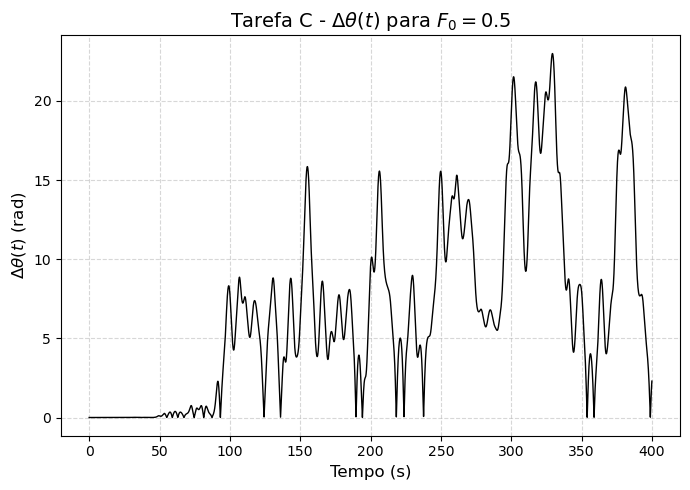

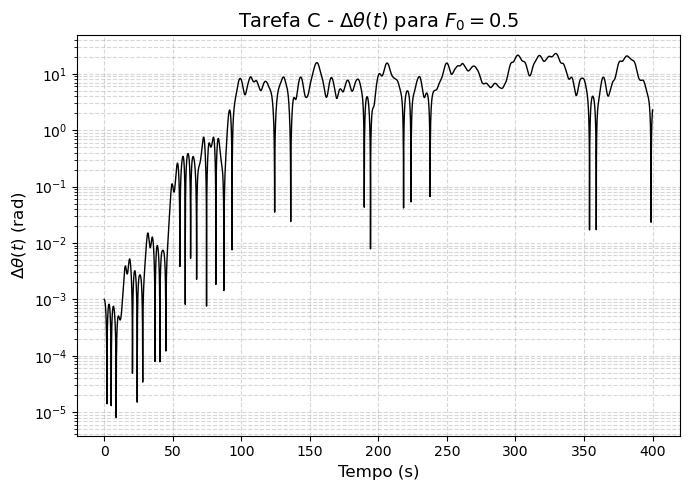

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.stats import linregress

def plot_item_C(caminho_arquivo, titulo=None, salvar=True):
    """
    Lê o arquivo de saída da Tarefa C e gera:
      - Gráfico Δθ(t) em escala linear
      - Gráfico Δθ(t) em escala semi-logarítmica
      - Estimativa do expoente de Liapunov (λ)
    Salva as imagens na mesma pasta do arquivo de entrada.
    """

    # Lê os dados
    dados = pd.read_csv(caminho_arquivo, sep=',', comment='#')

    # Extrai colunas relevantes
    tempo = dados['temp']
    delta_theta = np.abs(dados['theta2-theta1'])

    # Garante que não haja zeros (para o log)
    delta_theta = np.where(delta_theta <= 1e-12, 1e-12, delta_theta)

    # ===== Gráfico 1: Δθ(t) em escala linear =====
    plt.figure(figsize=(7, 5))
    plt.plot(tempo, delta_theta, color='black', lw=1)
    plt.xlabel('Tempo (s)', fontsize=12)
    plt.ylabel(r'$\Delta \theta (t)$ (rad)', fontsize=12)
    plt.title(titulo or r'$\Delta \theta (t)$ - Escala Linear', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()

    nome_base = os.path.splitext(caminho_arquivo)[0]
    nome_saida1 = nome_base + "_linear.png"

    if salvar:
        plt.savefig(nome_saida1, dpi=300)
        print(f"Imagem salva: {nome_saida1}")
    else:
        plt.show()

    # ===== Gráfico 2: Δθ(t) em escala semi-log =====
    plt.figure(figsize=(7, 5))
    plt.semilogy(tempo, delta_theta, color='black', lw=1)
    plt.xlabel('Tempo (s)', fontsize=12)
    plt.ylabel(r'$\Delta \theta (t)$ (rad)', fontsize=12)
    plt.title(titulo or r'$\Delta \theta (t)$ - Escala Semi-Log', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5, which='both')
    plt.tight_layout()

    nome_saida2 = nome_base + "_semilog.png"

    if salvar:
        plt.savefig(nome_saida2, dpi=300)
        print(f"Imagem salva: {nome_saida2}")
    else:
        plt.show()

    # ===== Estimativa do expoente de Liapunov (λ) =====
    # Vamos ajustar log(Δθ) = λ * t + c no início (onde há crescimento exponencial)
    limite = int(len(tempo) * 0.3)  # usa primeiros 30% dos dados
    slope, intercept, r, p, stderr = linregress(tempo[:limite], np.log(delta_theta[:limite]))
    print(f"Estimativa de λ (Liapunov): {slope:.4e}  [r={r:.3f}]")

    return slope


# Exemplo de uso:
# Para o caso F0 = 0.5 ou 1.2 (basta trocar o arquivo correspondente)
plot_item_C(
    'tarefa-C/saida-2-12694394.txt',
    titulo=r'Tarefa C - $\Delta \theta(t)$ para $F_0 = 0.5$'
)
